##**Practica de entrenamiento de ML con XGboost**

Mi objetivo es entrenar un modelo de Machine Learning con XGBoosting para predecir propinas.

###**By**
- Samuel Mejia Chavarriaga
- 3155128625
- samuel1022007@gmail.com

##**Descripcion de los datos**
Los datos en este proyecto provienen del dataset "hotel tip" hecho por JAWAD AHMAD publicado en kaggle.
Este me parecio un dataset interesante y util para lo que busco.
- https://www.kaggle.com/datasets/jawad3664/hotal-tip

# **1. Cargar librerias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Cargar el conjunto de datos**

In [3]:
df = pd.read_csv('/content/sample_data/tips.csv')
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# **3. Analisis del conjunto de datos**

El data set tiene 244 registros y 7 columnas de las cuales tenemos:
- 1 int64 // Variables numericas
- 2 float64 // Variable de conteo
- 4 objects // Variables categorica
- No hay datos nulos ni irrelevantes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# **4. Limpieza y Preparacion del conjunto de datos**
Organizamos las variables, dejando solo las categorizables y las numericas y desechando las que no usaremos.
XGBoost requiere que todas las variables sean numericas por lo que convertimos las variables vategoricas en numericas:
- sex: Mujer=0, Hombre=1
- smoker: No=0, Sí=1
- day: Jueves=0, Viernes=1, Sábado=2, Domingo=3
- time: Almuerzo=0, Cena=1

In [5]:
df['sex'] = df['sex'].map({'Female':0,'Male':1})
df['smoker'] = df['smoker'].map({'No':0,'Yes':1})
df['day'] = df['day'].map({'Thur':0,'Fri':1,'Sat':2,'Sun':3})
df['time'] = df['time'].map({'Lunch':0,'Dinner':1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [6]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


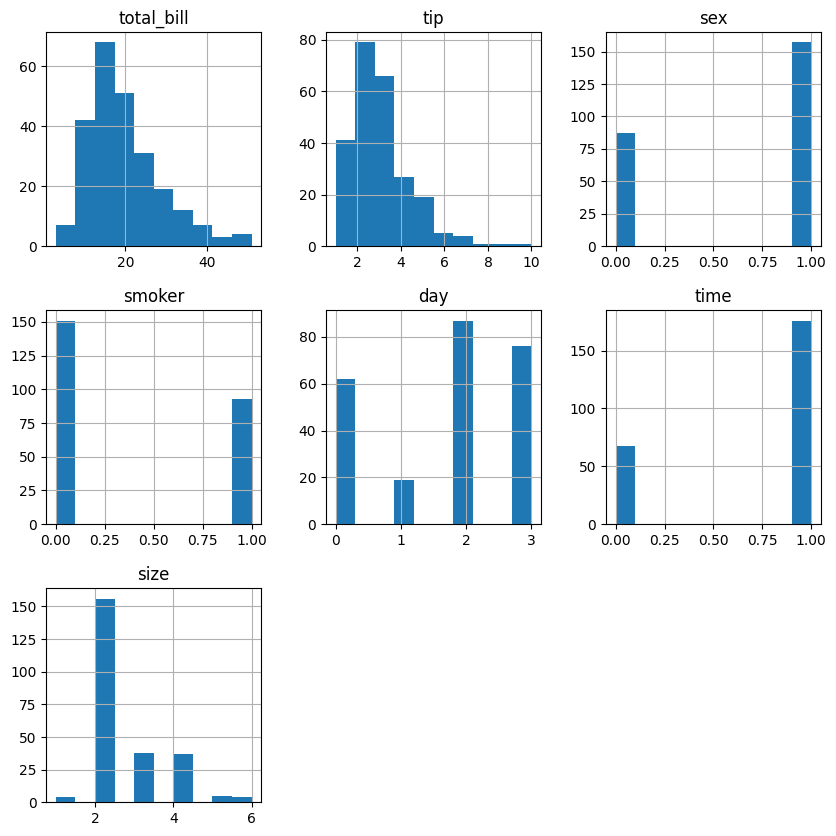

In [7]:
df.hist(figsize=(10,10))
plt.show()

# Modelo de XGBoost
#### Separamos las variables en independientes y dependiente
- X = Todas las variables excepto "tip" ya que este es lo qu8e queremos predecir.
- Y = la variable "tip" que es lo que buscamos predecir.
- train_test_split: Dividimos 70% para entrenamiento y 30% para prueba.


In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
features = ['total_bill', 'sex', 'smoker', 'day', 'time', 'size']
target = 'tip'
X = df[features] # Features son todas las columnas excepto 'tip'
y = df[target] # Target es la columna 'tip'

# Dividimos los datos entre sets de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Implememtacion de XgBoost
- **objective='reg:squarederror'** = Define que estamos trabajando con un problema de regresión (predicción de valores continuos). Este objetivo minimiza el error cuadrático entre predicciones y valores reales.
- **n_stimators** = Número de árboles de decisión que el modelo construirá secuencialmente. Cada árbol aprende de los errores del anterior, en este caso usamos 100.
- **learning_rate** = lo ponemos en 0.1 para controlar cuanto aprende el modelo en cada iteracion, entre mas bajo el aprendizaje es mas estable reduciendo el riesgo de sobreajuste.
- **random_state** = Semilla para reproducibilidad. Garantiza que obtendremos los mismos resultados cada vez que ejecutemos el código. A partir de 42 se considera aleatorio.


In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Definimos el modelo con sus respectivos parametros
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenamos el modelo con los datos de entrada y etiquetas definidas anteriormente
xgbr.fit(X_train, y_train)

# Hacemos predicciones con el modelo de prueba
y_pred = xgbr.predict(X_test)

y_pred

array([3.1441214, 2.5831883, 3.6685617, 3.5600853, 1.8802614, 3.310832 ,
       5.568344 , 1.6256543, 2.3854654, 3.090467 , 2.9915123, 1.729072 ,
       1.7835871, 2.2079587, 1.6850767, 2.6960852, 3.2877314, 3.494244 ,
       2.5656624, 5.9306097, 3.6755526, 3.5706584, 2.7077944, 1.5499247,
       3.4369266, 2.9744978, 1.6541094, 3.9394076, 2.6424773, 5.522867 ,
       5.124265 , 1.7645162, 3.1346788, 3.6541805, 2.465699 , 4.0851316,
       1.9967772, 3.795077 , 1.8107706, 3.647507 , 1.729072 , 2.1810787,
       3.3725371, 2.4708488, 1.905465 , 1.1763363, 2.0631588, 3.0013294,
       1.9362062, 2.0522275, 3.3678384, 3.7954047, 5.658416 , 2.2152936,
       2.544364 , 1.7683136, 2.676956 , 3.3073084, 2.6162007, 2.1193027,
       4.146829 , 2.4246364, 4.7352867, 3.1137726, 2.965442 , 2.7103148,
       2.256487 , 1.3035022, 3.318241 , 3.6092591, 2.827711 , 3.5410762,
       3.035068 , 2.7021852], dtype=float32)

#**Implementacion de metricas diagnosticas** (Todo esto esta malo debido a que estoy trabajando regresion debido a mi problema por lo cual debo de a aplicar otros metodos de evaluacion)
Generamos un reporte de clasificacion y las visualizamos
- **Matriz de confusion (confusion_matrix)** : Evalua la precision de un modelo clasificatorio y visualiza el desempenio en terminos de verdaderos y falsos.
- **Curva ROC (roc_curve)** : Grafica la relacion entre la tasa de verdaderos positivos y la tasa de falsos positivos a diferentes umbrales de clasificacion.

In [ ]:
# You can ignore this cell as confusion matrix and ROC curve are for classification problems.
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ConfusionMatrix = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=np.array([y_test, y_pred])
# disp.plot()
# plt.show()

# **Evaluación del modelo**
Dado que este es un problema de regresión (predecir un valor continuo), utilizaremos métricas de regresión para evaluar el rendimiento del modelo.

- **Mean Squared Error (MSE)**: Mide el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo.
- **Root Mean Squared Error (RMSE)**: Es la raíz cuadrada del MSE. Tiene la misma unidad que la variable objetivo ('tip'), lo que lo hace más interpretable. Un RMSE más bajo indica un mejor rendimiento del modelo.
- **Mean Absolute Error (MAE)**: Error absoluto medio.
- **R² Score**: Coeficiente de determinación (0-1). Indica qué tan bien el modelo explica la variabilidad de los datos. Más cercano a 1 es mejor.

## **Métricas de Evaluación Explicadas**

### Mean Squared Error (MSE) - Error Cuadrático Medio
- **Qué mide**: El promedio de los errores al cuadrado
- **Cómo interpretarlo**:
  - Valores más bajos = mejor modelo
  - Penaliza fuertemente los errores grandes (porque eleva al cuadrado)
  - En nuestro caso: MSE = 0.8236
- **Ejemplo práctico**: Si predecimos una propina de 3 pero en realidad fue 4, el error es 1, pero el MSE considera este error como 1² = 1

### Root Mean Squared Error (RMSE) - Raíz del Error Cuadrático Medio
- **Qué mide**: La raíz cuadrada del MSE
- **Cómo interpretarlo**:
  - Está en las mismas unidades que nuestra variable objetivo (dólares)
  - Más fácil de interpretar que MSE
  - En nuestro caso: RMSE = 0.9075
- **Ejemplo práctico**: En promedio, nuestras predicciones se desvían aproximadamente $0.91 del valor real

### Mean Absolute Error (MAE) - Error Absoluto Medio
- **Qué mide**: El promedio de los errores absolutos (sin elevar al cuadrado)
- **Cómo interpretarlo**:
  - No penaliza tanto los errores grandes como MSE/RMSE
  - Más robusto ante valores atípicos
  - En nuestro caso: MAE = 0.7050
- **Ejemplo práctico**: En promedio, nos equivocamos por $0.70 en cada predicción

### R² Score (Coeficiente de Determinación)
- **Qué mide**: Qué proporción de la variabilidad en los datos explica nuestro modelo
- **Cómo interpretarlo**:
  - Rango: 0 a 1 (0% a 100%)
  - Más cercano a 1 = mejor modelo
  - En nuestro caso: R² = 0.3752 (37.52%)
- **Ejemplo práctico**: Nuestro modelo explica el 37.52% de la variación en las propinas. El 62.48% restante se debe a otros factores no capturados por nuestras variables.

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular métricas de regresión
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("=== Métricas del Modelo ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

=== Métricas del Modelo ===
Mean Squared Error (MSE): 0.8236
Root Mean Squared Error (RMSE): 0.9075
Mean Absolute Error (MAE): 0.7050
R² Score: 0.3752


## Interpretación de los Gráficos

### Gráfico 1: Valores Reales vs Predicciones
- **Línea roja**: Representa predicciones perfectas (donde predicción = valor real)
- **Puntos dispersos**: Nuestras predicciones reales
- **Interpretación**:
  - Puntos cerca de la línea roja = buenas predicciones
  - Puntos alejados = predicciones con mayor error
  - Patrones de dispersión nos muestran dónde el modelo tiene dificultades

### Gráfico 2: Distribución de Errores
- **Eje X**: Magnitud del error (positivo o negativo)
- **Eje Y**: Frecuencia de cada error
- **Línea roja**: Error = 0 (predicción perfecta)
- **Interpretación ideal**:
  - Distribución simétrica alrededor de 0
  - La mayoría de errores pequeños
  - Pocos errores grandes

### Gráfico 3: Gráfico de Residuos
- **Residuos**: Diferencia entre valor real y predicción
- **Línea roja horizontal**: Residuo = 0
- **Interpretación**:
  - Patrón aleatorio = buen modelo
  - Patrones sistemáticos = modelo puede mejorarse
  - Heteroscedasticidad (varianza cambiante) = posible problema

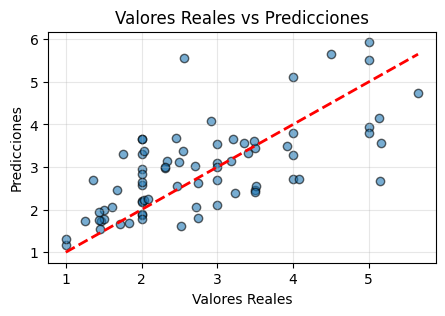

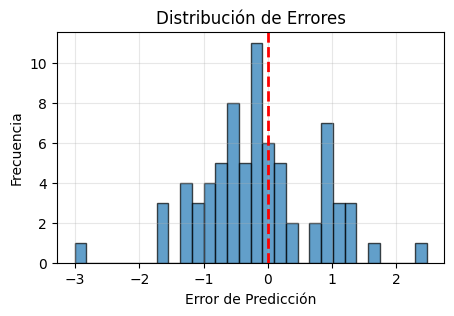

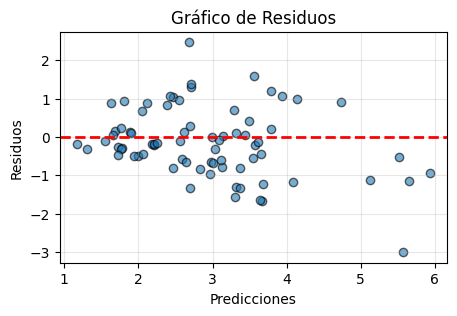

In [14]:
import matplotlib.pyplot as plt

# Gráfico: Valores reales vs predicciones
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico: Distribución de errores
errores = y_test - y_pred
plt.figure(figsize=(5, 3))
plt.hist(errores, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico: Residuos
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, errores, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid(True, alpha=0.3)
plt.show()

## **Conclusiones**

1. **R² de 0.3752** Indica que hay relaciones pero podemos mejorar
2. **RMSE de $0.91** Hay un error promedio razonable pero mejorable

**Posibles Mejoras**
- **Mas datos**
    - Recopilar mas ejemplos.
    - Incluir mas variables como hora del dia, validad de servicio o clima.
  
